<a href="https://colab.research.google.com/github/Rukawuba/Healthcare/blob/main/Healthcare_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import pandas as pd
health_ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=',')
health_ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
health_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
health_ds.shape

(1338, 7)

In [ ]:
health_ds = health_ds.drop_duplicates().reset_index(drop=True)
health_ds.head(10)


Here we can continue the EDA.....

In [5]:
from sklearn.preprocessing import MinMaxScaler

health_ds["sex_n"] = pd.factorize(health_ds["sex"])[0]
health_ds["smoker_n"] = pd.factorize(health_ds["smoker"])[0]
health_ds["region_n"] = pd.factorize(health_ds["region"])[0]

num_variables = ["sex_n","smoker_n","region_n","age","bmi","children","charges"]


scaler = MinMaxScaler()
scal_features = scaler.fit_transform(health_ds[num_variables])
health_ds_scal = pd.DataFrame(scal_features, index = health_ds.index, columns = num_variables)
health_ds_scal.head(10)

,sex_n,smoker_n,region_n,age,bmi,children,charges
0,0.0,0.0,0.000000,0.021739,0.321227,0.0,0.251611
1,1.0,1.0,0.333333,0.000000,0.479150,0.2,0.009636
2,1.0,1.0,0.333333,0.217391,0.458434,0.6,0.053115
3,1.0,1.0,0.666667,0.326087,0.181464,0.0,0.333010
4,1.0,1.0,0.666667,0.304348,0.347592,0.0,0.043816
5,0.0,1.0,0.333333,0.282609,0.263115,0.0,0.042056
6,0.0,1.0,0.333333,0.608696,0.470272,0.2,0.113629
7,0.0,1.0,0.666667,0.413043,0.316922,0.6,0.098320
8,1.0,1.0,1.000000,0.413043,0.373150,0.4,0.084352
9,0.0,1.0,0.666667,0.913043,0.265806,0.0,0.443765


In [6]:
#Feature Selection
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
X = health_ds_scal.drop("charges", axis = 1)
y = health_ds_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()


,smoker_n,age,bmi,children
0,0.0,0.565217,0.618510,0.0
1,1.0,0.608696,0.470272,0.2
2,1.0,0.000000,0.355260,0.0
3,0.0,0.086957,0.985203,0.2
4,0.0,0.826087,0.107345,0.0


In [8]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)



Linear Regression Model

In [10]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,smoker_n,age,bmi,children,charges
0,0.0,0.565217,0.618510,0.0,0.668197
1,1.0,0.608696,0.470272,0.2,0.115130
2,1.0,0.000000,0.355260,0.0,0.098994
3,0.0,0.086957,0.985203,0.2,0.692427
4,0.0,0.826087,0.107345,0.0,0.339845


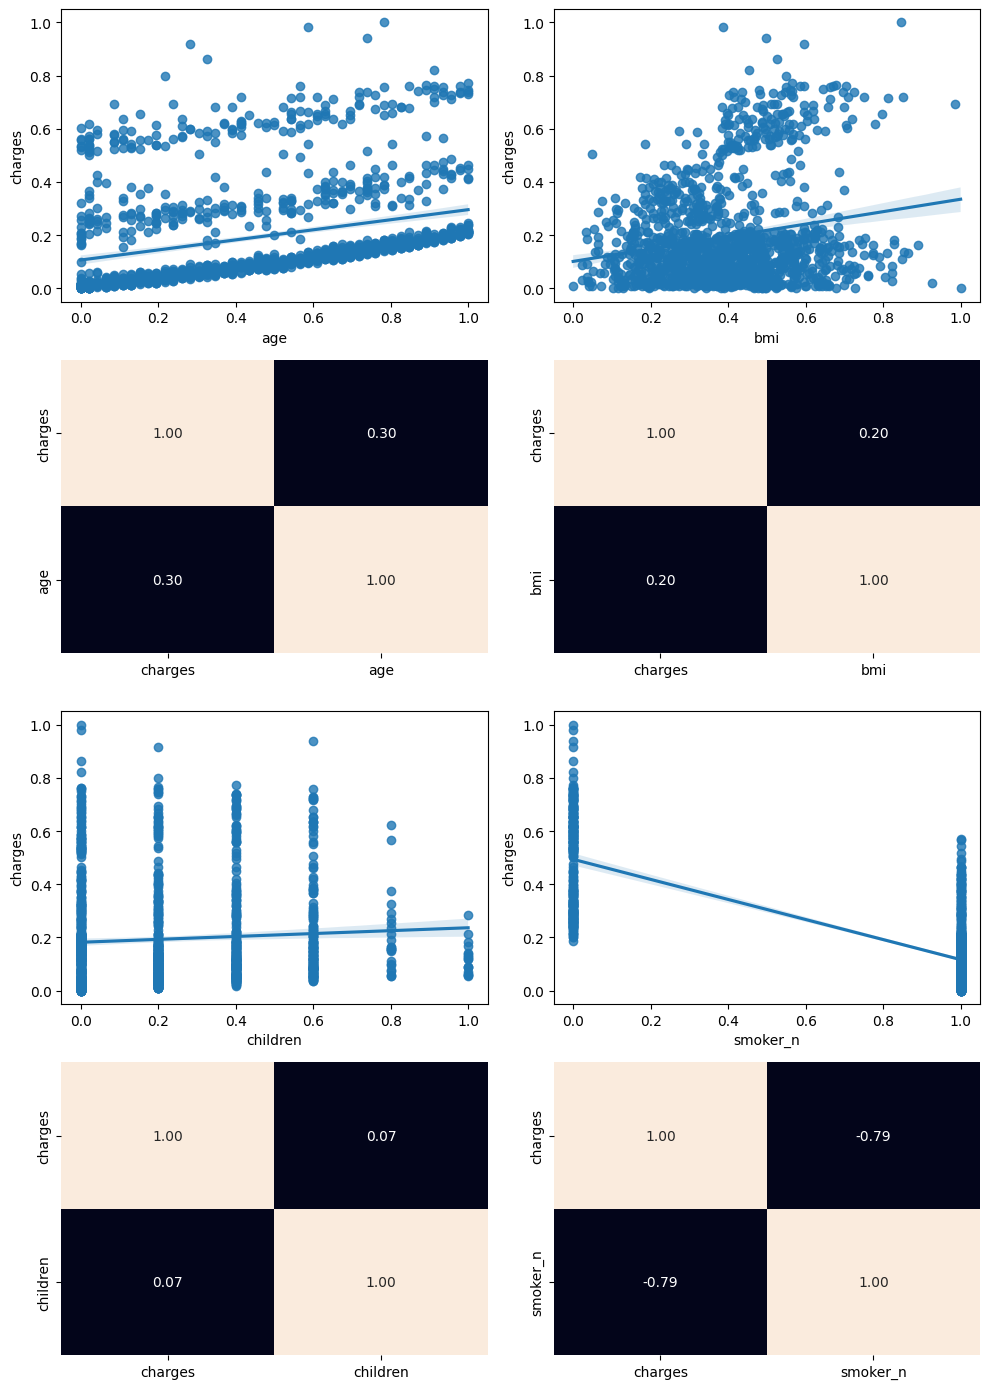

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4,2, figsize = (10,14))
full_data = pd.concat([train_data, test_data])

sns.regplot(data=full_data, x="age", y = "charges", ax = axis[0,0])
sns.heatmap(full_data[["charges","age"]].corr(), annot = True, fmt =".2f", ax = axis [1,0], cbar = False)

sns.regplot(data=full_data, x="bmi", y = "charges", ax = axis[0,1])
sns.heatmap(full_data[["charges","bmi"]].corr(), annot = True, fmt =".2f", ax = axis [1,1], cbar = False)


sns.regplot(data=full_data, x="children", y = "charges", ax = axis[2,0])
sns.heatmap(full_data[["charges","children"]].corr(), annot = True, fmt =".2f", ax = axis [3,0], cbar = False)

sns.regplot(data=full_data, x="smoker_n", y = "charges", ax = axis[2,1])
sns.heatmap(full_data[["charges","smoker_n"]].corr(), annot = True, fmt =".2f", ax = axis [3,1], cbar = False)



plt.tight_layout()
plt.show()

In [12]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f"Intercep (a):{model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")


Intercep (a):0.3305399282744723
Coefficients (b1, b2): [-0.38480791  0.18998818  0.19091492  0.04150583]


In [15]:
y_pred = model.predict(X_test)
y_pred

array([ 0.17673907,  0.08784236,  0.22001069,  0.46818325,  0.51237488,
        0.01843583,  0.16092389,  0.14164046,  0.21428076,  0.15848698,
        0.09124273,  0.11642281, -0.03657807,  0.49400962,  0.07938851,
        0.24740539,  0.17483121,  0.17909424,  0.05863923,  0.44701544,
        0.16150553,  0.43793804,  0.13090091,  0.21232898,  0.08505969,
        0.20338121,  0.15938008,  0.23758134,  0.02913591,  0.21226396,
        0.13320009,  0.43143732,  0.50556018,  0.15101389,  0.04221844,
        0.55092565,  0.15839821,  0.46719199,  0.16165066,  0.17989653,
        0.56275412,  0.55663604,  0.04670804,  0.07886745,  0.49460774,
        0.16283322,  0.17519971,  0.57664179,  0.58034723,  0.04059881,
       -0.00420899,  0.21183958,  0.49216198,  0.1742495 ,  0.17829959,
        0.08782401,  0.22574506,  0.5729934 ,  0.07197705,  0.35981663,
        0.18029675,  0.17474959,  0.16259629,  0.51128254,  0.3778706 ,
        0.0423832 ,  0.52397838,  0.10961409,  0.01085533,  0.18

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.00855456572057562
R2 Score: 0.7621971104053862
